In [1]:
from math import trunc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from mpl_toolkits.basemap import Basemap
#from matplotlib.patches import Polygon

In [2]:
def drop_outliers(df):
    col_interest = 'Victims Injured'
    q1 = df[col_interest].quantile(0.25)
    q3 = df[col_interest].quantile(0.75)
    iqr = q3 - q1
    outliers_removed = df[(df[col_interest] >= (q1 - 1.5 * iqr)) & (df[col_interest] <= (q3 + 1.5 * iqr))]
def proccess_data():
    data_path = 'Data/MergedGunData.csv'
    df = pd.read_csv(data_path)
    # Check for missing values
    missing_values = df.isnull().sum()
    print(missing_values)
    # drop the cases with no address but no operations is fine since only 13 cases
    df = df.dropna(subset=['Address'])
    #handle data parsing
    df['dates_proccessed'] = pd.to_datetime(df['Incident Date'], format='%B %d, %Y')
    df.sort_values(by='dates_proccessed')
    #Optional: write back proccessed data
    df.to_csv('ProcessedGunData.csv',index=False)

proccess_data()

Incident ID             0
Incident Date           0
State                   0
City Or County          0
Address                13
Victims Killed          0
Victims Injured         0
Suspects Killed         0
Suspects Injured        0
Suspects Arrested       0
Operations           3018
Year                    0
dtype: int64


In [59]:
'''
Summary of Total Killed and Injured 
'''

# Load the data
file_path = 'ProcessedGunData.csv'
df = pd.read_csv(file_path)
print(df.columns)


Index(['Incident ID', 'Incident Date', 'State', 'City Or County', 'Address',
       'Victims Killed', 'Victims Injured', 'Suspects Killed',
       'Suspects Injured', 'Suspects Arrested', 'Operations', 'Year',
       'dates_proccessed'],
      dtype='object')


C:\Users\hari2\AppData\Local\Temp\ipykernel_4820\1286867607.py:8: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



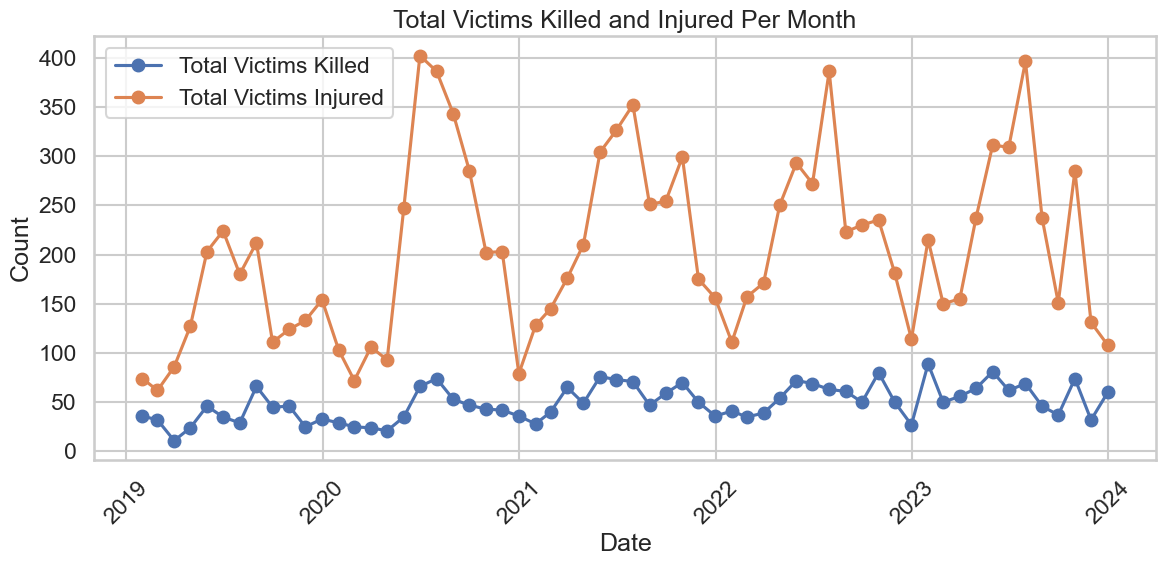

In [61]:


# Convert 'Incident Date' to datetime format
df['Incident Date'] = pd.to_datetime(df['Incident Date'])

# Set the index to 'Incident Date'
df.set_index('Incident Date', inplace=True)

# Resample the data to get monthly totals
monthly_totals = df.resample('M').agg({'Victims Killed': 'sum', 'Victims Injured': 'sum'})

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_totals.index, monthly_totals['Victims Killed'], label='Total Victims Killed', marker='o')
plt.plot(monthly_totals.index, monthly_totals['Victims Injured'], label='Total Victims Injured', marker='o')
plt.title('Total Victims Killed and Injured Per Month')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

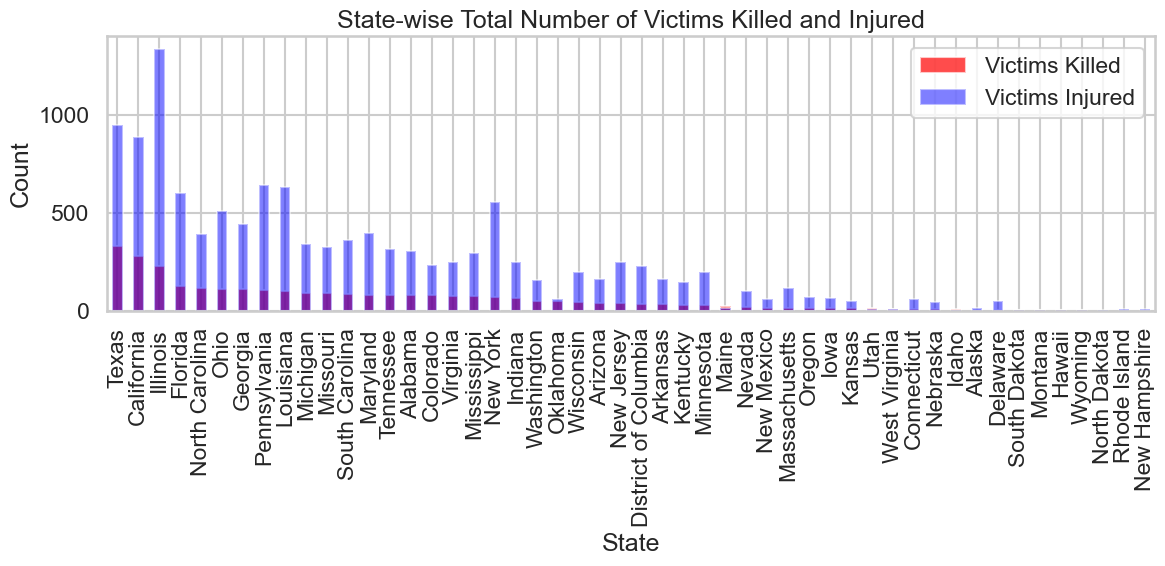

In [63]:
''' 
State-wise distribution of victims killed and injured
'''

file_path = 'ProcessedGunData.csv'
df = pd.read_csv(file_path)

# Group by state and calculate the total number of victims killed and injured
state_totals = df.groupby('State').agg({'Victims Killed': 'sum', 'Victims Injured': 'sum'})

# Sort by the total number of victims killed for better visualization
state_totals = state_totals.sort_values(by='Victims Killed', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
state_totals['Victims Killed'].plot(kind='bar', color='red', alpha=0.7, label='Victims Killed')
state_totals['Victims Injured'].plot(kind='bar', color='blue', alpha=0.5, label='Victims Injured')

plt.title('State-wise Total Number of Victims Killed and Injured')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\hari2\AppData\Local\Temp\ipykernel_4820\2435014191.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




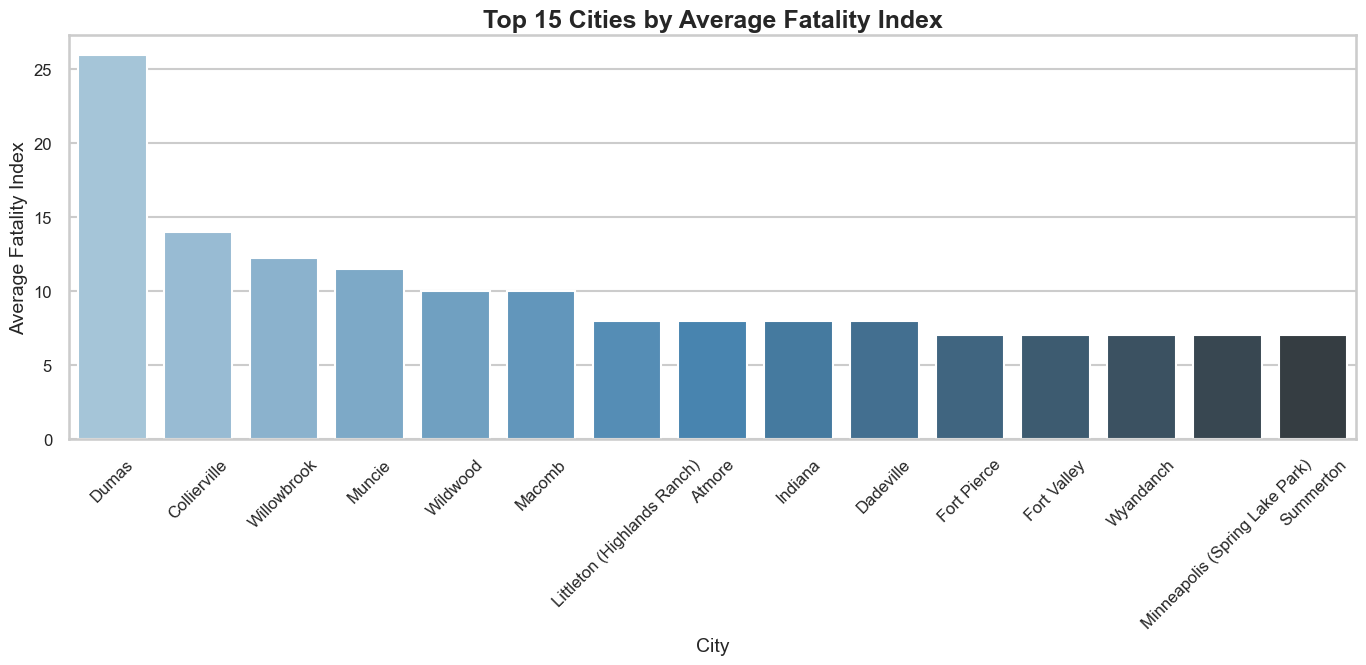

C:\Users\hari2\AppData\Local\Temp\ipykernel_4820\2435014191.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




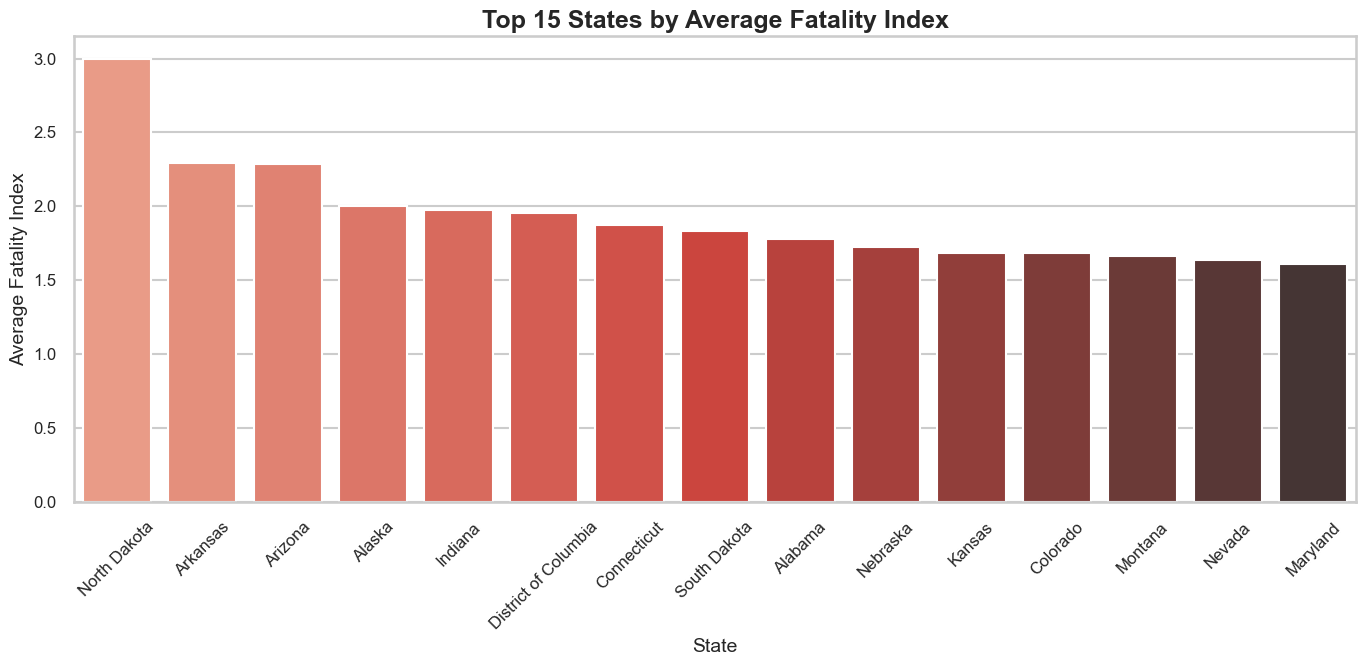

In [65]:
''' 
Fatality Index = (# of Victims Killed) / (# of Victims Injured)
'''

import pandas as pd
import matplotlib.pyplot as plt


# Load the data
file_path = 'ProcessedGunData.csv'
df = pd.read_csv(file_path)

# Calculate the Fatality Index (Victims Injured / Victims Killed)
df['Fatality Index'] = df.apply(
    lambda row: row['Victims Injured'] / row['Victims Killed'] if row['Victims Killed'] > 0 else 0, axis=1
)

# Set Seaborn style
sns.set(style='whitegrid', context='talk')

# Top 15 Cities by Fatality Index
city_fatality = df.groupby('City Or County')['Fatality Index'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x=city_fatality.index, y=city_fatality.values, palette='Blues_d')
plt.title('Top 15 Cities by Average Fatality Index', fontsize=18, weight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Fatality Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


# Top 15 States by Fatality Index
state_fatality = df.groupby('State')['Fatality Index'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x=state_fatality.index, y=state_fatality.values, palette='Reds_d')
plt.title('Top 15 States by Average Fatality Index', fontsize=18, weight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Fatality Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\hari2\AppData\Local\Temp\ipykernel_4820\233084345.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




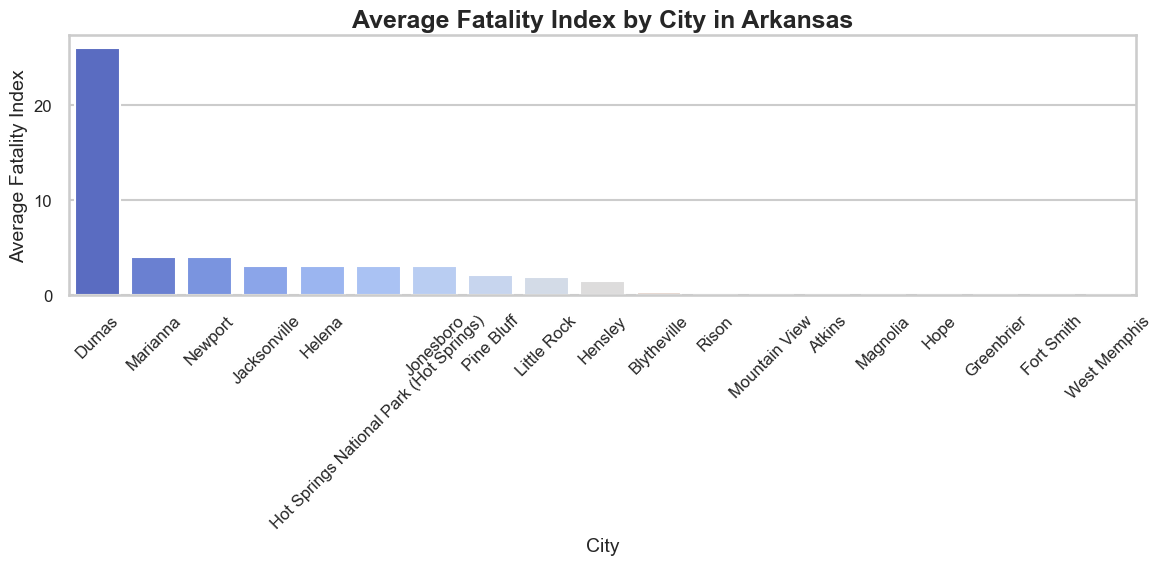

In [67]:
''' 
Specifically looking at North Dakota now
'''

# Load the data
file_path = 'ProcessedGunData.csv'
df = pd.read_csv(file_path)

# Calculate the Fatality Index (Victims Injured / Victims Killed)
df['Fatality Index'] = df.apply(
    lambda row: row['Victims Injured'] / row['Victims Killed'] if row['Victims Killed'] > 0 else 0, axis=1
)

# Filter for incidents in North Dakota
north_dakota_data = df[df['State'] == 'Arkansas']

# Group by city and calculate average Fatality Index
city_fatality_nd = north_dakota_data.groupby('City Or County')['Fatality Index'].mean().sort_values(ascending=False)

# Plotting the Average Fatality Index by City in North Dakota
plt.figure(figsize=(12, 6))
sns.barplot(x=city_fatality_nd.index, y=city_fatality_nd.values, palette='coolwarm')
plt.title('Average Fatality Index by City in Arkansas', fontsize=18, weight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Fatality Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

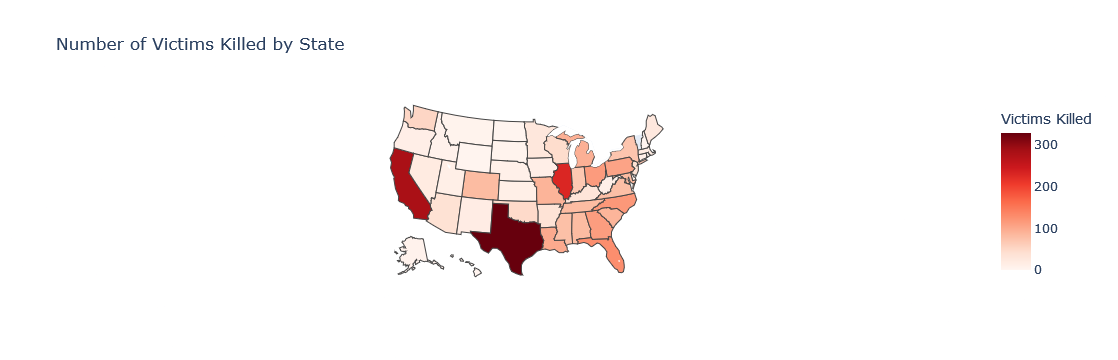

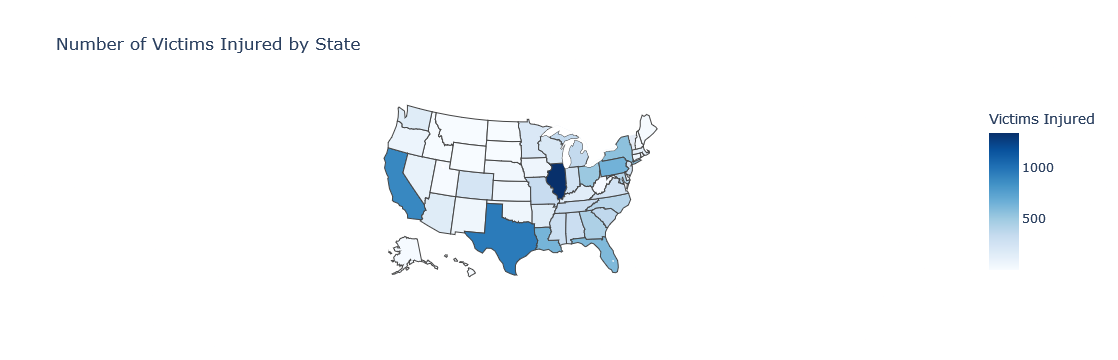

In [69]:
import pandas as pd
import plotly.express as px

# Load the data
file_path = 'ProcessedGunData.csv'
df = pd.read_csv(file_path)

# Dictionary to map full state names to abbreviations
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

# Convert full state names to abbreviations
df['State'] = df['State'].map(state_abbr)

# Calculate total victims killed and injured for each state
total_victims = df.groupby('State').agg({'Victims Killed': 'sum', 'Victims Injured': 'sum'}).reset_index()

# Create choropleth map for victims killed
fig_killed = px.choropleth(
    total_victims,
    locations='State',
    locationmode='USA-states',
    color='Victims Killed',
    scope='usa',
    color_continuous_scale='Reds',
    labels={'Victims Killed': 'Victims Killed'},
    title='Number of Victims Killed by State'
)

# Create choropleth map for victims injured
fig_injured = px.choropleth(
    total_victims,
    locations='State',
    locationmode='USA-states',
    color='Victims Injured',
    scope='usa',
    color_continuous_scale='Blues',
    labels={'Victims Injured': 'Victims Injured'},
    title='Number of Victims Injured by State'
)

# Show the maps
fig_killed.show()
fig_injured.show()

In [ ]:
"""
Justice Index

Columns- 

Arrested-
Suspect Surrendered (if Arrested)
Suspect Captured (if not surrendered)

Killed
Suspect Killed by police
Suspect Killed self
Bystander incidents to be eliminated

"""

In [97]:
def add_surrendered_captured_data(df,new_data_path):
    df_new = pd.read_csv(new_data_path)
    # Check for missing values
    missing_values = df_new.isnull().sum()
    print(missing_values)
    # drop the cases with no address but no operations is fine since only 13 cases
    df_new = df_new.dropna(subset=['Address'])
    #handle data parsing
    df_new['dates_proccessed'] = pd.to_datetime(df['Incident Date'], format='%B %d, %Y')
    df_new.sort_values(by='dates_proccessed')
    
    # Create a dictionary mapping 'Incident ID' to 'Suspect Arrested'
    id_to_arrested = dict(zip(df_new['Incident ID'], df_new['Suspects Arrested']))
    
    # Create the new 'Suspect Surrendered' column
    df['Suspect Surrendered'] = df['Incident ID'].map(id_to_arrested).fillna(0).astype(int)

    df['Suspect Captured'] = 0

    for index, row in df.iterrows():
        if(df.loc[index,'Suspects Arrested']>0 and df.loc[index,'Suspect Surrendered'] == 0):
            df.loc[index,'Suspect Captured'] = df.loc[index,'Suspects Arrested']
    
    return df
    



In [99]:
def add_suicide_kills_data(df,new_data_path):
    df_new = pd.read_csv(new_data_path)
    # Check for missing values
    missing_values = df_new.isnull().sum()
    print(missing_values)
    # drop the cases with no address but no operations is fine since only 13 cases
    df_new = df_new.dropna(subset=['Address'])
    #handle data parsing
    df_new['dates_proccessed'] = pd.to_datetime(df['Incident Date'], format='%B %d, %Y')
    df_new.sort_values(by='dates_proccessed')
    
        # Create a dictionary mapping 'Incident ID' to 'Suspect Arrested'
    id_to_killed = dict(zip(df_new['Incident ID'], df_new['Suspects Killed']))
    
    df['Suspects Suicide'] = df['Incident ID'].map(id_to_killed).fillna(0).astype(int)

    df['Suspects Killed by Cop'] = 0

    for index, row in df.iterrows():
        if(df.loc[index,'Suspects Killed']>0 and df.loc[index,'Suspects Suicide'] == 0):
            df.loc[index,'Suspects Killed by Cop'] = df.loc[index,'Suspects Killed']
            #print(df.loc[index,'Suspects Killed'])
    
    return df



In [189]:
df_added = add_surrendered_captured_data(df,'Data/mass_shooting_13_24_surrenders.csv')
df_added = add_suicide_kills_data(df_added,'Data/mass_shooting_13_24_suicides.csv')

df_added

Incident ID           0
Incident Date         0
State                 0
City Or County        0
Address               0
Victims Killed        0
Victims Injured       0
Suspects Killed       0
Suspects Injured      0
Suspects Arrested     0
Operations           20
dtype: int64
Incident ID            0
Incident Date          0
State                  0
City Or County         0
Address                0
Victims Killed         0
Victims Injured        0
Suspects Killed        0
Suspects Injured       0
Suspects Arrested      0
Operations           186
dtype: int64


,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Year,dates_proccessed,Suspect Surrendered,Suspect Captured,Suspects Suicide,Suspects Killed by Cop,Police Action Index,Justice Served Index
0,1582816,"December 29, 2019",Illinois,Danville,1803 block of Westview Ave,0,5,0,0,0,NaN,2019,2019-12-29,0,0,0,0,-25.0,-25.0
1,1582197,"December 29, 2019",New York,Buffalo,50 block of Henrietta Ave,1,3,0,0,0,NaN,2019,2019-12-29,0,0,0,0,-35.0,-35.0
2,1583444,"December 29, 2019",California,Ceres,800 block of Allacante Dr,0,5,0,0,0,NaN,2019,2019-12-29,0,0,0,0,-25.0,-25.0
3,1581590,"December 27, 2019",California,Modesto,1900 block of Vernon Ave,1,3,0,0,0,NaN,2019,2019-12-27,0,0,0,0,-35.0,-35.0
4,1581103,"December 27, 2019",Texas,Houston,500 block of Smart St,2,7,0,0,4,NaN,2019,2019-12-27,0,4,0,0,325.0,245.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,2492601,"January 1, 2023",Illinois,Chicago,300 block of E 57th St,1,3,0,0,0,NaN,2023,2023-01-01,0,0,0,0,-35.0,-35.0
3001,2492611,"January 1, 2023",North Carolina,Durham,1000 N Miami Blvd,0,5,0,0,0,NaN,2023,2023-01-01,0,0,0,0,-25.0,-25.0
3002,2493102,"January 1, 2023",Pennsylvania,Allentown,1140 E Clair St,0,4,0,0,0,NaN,2023,2023-01-01,0,0,0,0,-20.0,-20.0
3003,2492448,"January 1, 2023",Florida,Ocala,1600 block of SW 5th St,2,4,0,0,1,NaN,2023,2023-01-01,0,1,0,0,40.0,20.0


In [105]:
df_added.to_csv('added_suspect_data.csv')

In [ ]:
"""
justice_served_index
police_action_index 

suspect capture - police action rewarded - justice index high
suspect kill - police action rewarded - justice index moderate - high
suspect suicide - police action penalized based on victim count
suspect surrender- police action penalized based on victim count
suspect injured only (rare)
suspect at large - police action heavily penalized based on victim count

"""

In [245]:
def add_justice_index(df):
    df['Justice Served Index'] = 0.0

    for index, row in df.iterrows():
        kills=df.loc[index,'Suspects Killed']
        arrests=df.loc[index,'Suspects Arrested']
        total_suspects = kills + arrests + df.loc[index,'Suspects Injured']
        escaped=(kills==0 and arrests == 0)
        
        kill_suicide=df.loc[index,'Suspects Suicide']
        kill_cop=df.loc[index,'Suspects Killed by Cop']
        arrests_surrender=df.loc[index,'Suspect Surrendered']
        arrests_capture=df.loc[index,'Suspect Captured']
        
        victim_kill = df.loc[index,'Victims Killed']
        victim_injured = df.loc[index,'Victims Injured']
        #print(df.loc[index,'Suspects Killed'])

        justice_served=0.0

        if(escaped):
            justice_served=0.0
        else:
            justice_served = arrests*0.8 + (kills*0.4)

        if(victim_kill>0 or victim_injured>0):
            justice_served -= (victim_kill*0.2 + victim_injured*0.05)

        justice_served_index = justice_served * 100
        df.loc[index,'Justice Served Index'] = justice_served_index
        
    return df
   
def add_police_action_index(df):

    df['Police Action Index'] = 0.0
    
    for index, row in df.iterrows():
        kills=df.loc[index,'Suspects Killed']
        arrests=df.loc[index,'Suspects Arrested']
        total_suspects = kills + arrests + df.loc[index,'Suspects Injured']
        escaped=(kills==0 and arrests == 0)
        
        kill_suicide=df.loc[index,'Suspects Suicide']
        kill_cop=df.loc[index,'Suspects Killed by Cop']
        arrests_surrender=df.loc[index,'Suspect Surrendered']
        arrests_capture=df.loc[index,'Suspect Captured']

        victim_kill = df.loc[index,'Victims Killed']
        victim_injured = df.loc[index,'Victims Injured']

        police_action=0

        if(escaped and (victim_kill+victim_injured == 0)):
            police_action = 0
        elif(escaped and (victim_kill+victim_injured > 0)):
            police_action -= (victim_kill*0.2 + victim_injured*0.05)
        
        if(total_suspects!=0):
            police_action += ((arrests_capture * 1.0) + (arrests_surrender * 0.8) + (kill_cop * 0.6) + (kill_suicide * 0.3))    
                  
        if(not(escaped) and (victim_kill+victim_injured > 0)):
            police_action -= (victim_kill*0.2 + victim_injured*0.05)
        

        
        police_action_index = police_action * 100
        df.loc[index,'Police Action Index'] = police_action_index
    
    return df


df_index_added = add_police_action_index(df_added)
df_index_added = add_justice_index(df_index_added)

In [246]:
df_index_added

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Year,dates_proccessed,Suspect Surrendered,Suspect Captured,Suspects Suicide,Suspects Killed by Cop,Police Action Index,Justice Served Index
0,1582816,"December 29, 2019",Illinois,Danville,1803 block of Westview Ave,0,5,0,0,0,NaN,2019,2019-12-29,0,0,0,0,-25.0,-25.0
1,1582197,"December 29, 2019",New York,Buffalo,50 block of Henrietta Ave,1,3,0,0,0,NaN,2019,2019-12-29,0,0,0,0,-35.0,-35.0
2,1583444,"December 29, 2019",California,Ceres,800 block of Allacante Dr,0,5,0,0,0,NaN,2019,2019-12-29,0,0,0,0,-25.0,-25.0
3,1581590,"December 27, 2019",California,Modesto,1900 block of Vernon Ave,1,3,0,0,0,NaN,2019,2019-12-27,0,0,0,0,-35.0,-35.0
4,1581103,"December 27, 2019",Texas,Houston,500 block of Smart St,2,7,0,0,4,NaN,2019,2019-12-27,0,4,0,0,325.0,245.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,2492601,"January 1, 2023",Illinois,Chicago,300 block of E 57th St,1,3,0,0,0,NaN,2023,2023-01-01,0,0,0,0,-35.0,-35.0
3001,2492611,"January 1, 2023",North Carolina,Durham,1000 N Miami Blvd,0,5,0,0,0,NaN,2023,2023-01-01,0,0,0,0,-25.0,-25.0
3002,2493102,"January 1, 2023",Pennsylvania,Allentown,1140 E Clair St,0,4,0,0,0,NaN,2023,2023-01-01,0,0,0,0,-20.0,-20.0
3003,2492448,"January 1, 2023",Florida,Ocala,1600 block of SW 5th St,2,4,0,0,1,NaN,2023,2023-01-01,0,1,0,0,40.0,20.0


In [133]:
df_index_added.to_csv('added_police_and_justice.csv')

In [85]:
abbrev_to_state = {v: k for k, v in state_abbr.items()}

In [89]:
df_index_added['State'] = df_index_added['State'].map(abbrev_to_state)

In [195]:
def incident_per_state(df):
    incident_by_state={}

    for index, row in df.iterrows():
        if(df.loc[index,'State'] in incident_by_state):
            incident_by_state[df.loc[index,'State']] += 1
        else:
            incident_by_state[df.loc[index,'State']] = 1

    return incident_by_state



def incident_per_city(df):
    incident_by_city={}

    for index, row in df.iterrows():
        if(df.loc[index,'City Or County'] in incident_by_city):
            incident_by_city[df.loc[index,'City Or County']] += 1
        else:
            incident_by_city[df.loc[index,'City Or County']] = 1

    return incident_by_city


In [197]:
incident_by_state = incident_per_state(df_index_added)
incident_by_city = incident_per_city(df_index_added)

In [ ]:
# TODO: Fix Colours 
# TODO : Find example incidents with worst police action and worst justice index example, proving the metric works

C:\Users\hari2\AppData\Local\Temp\ipykernel_4820\1535243038.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




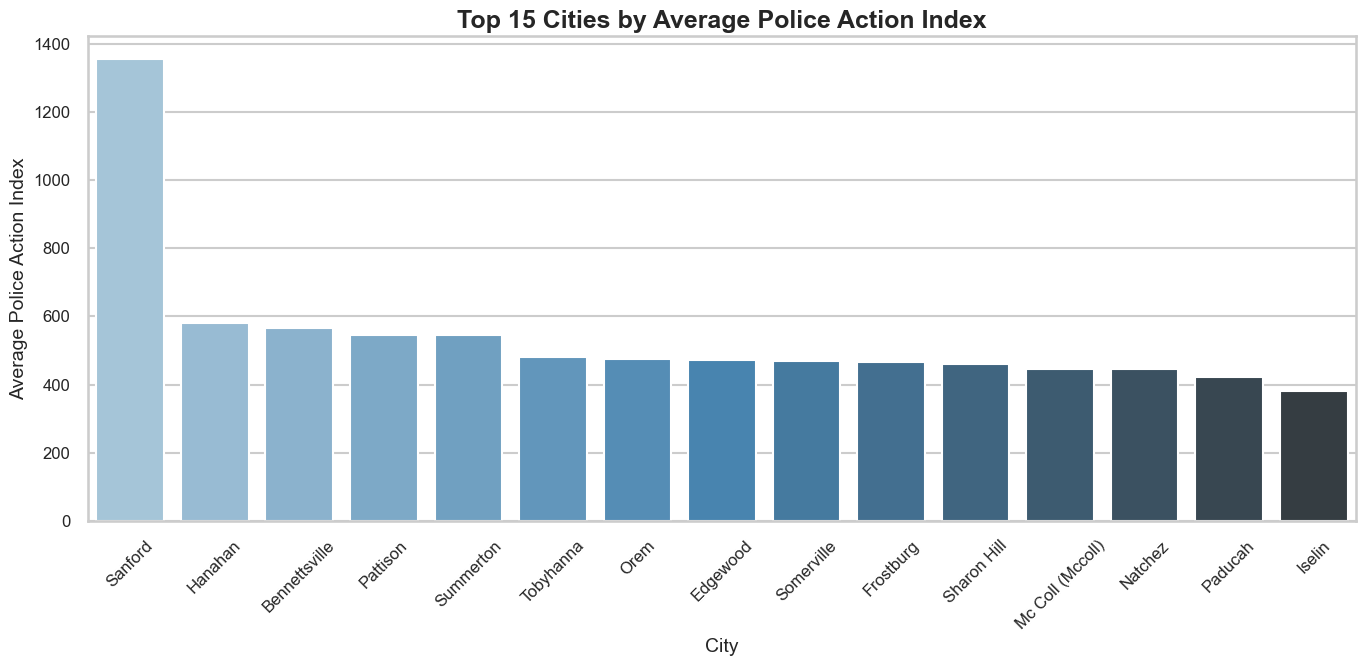

C:\Users\hari2\AppData\Local\Temp\ipykernel_4820\1535243038.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




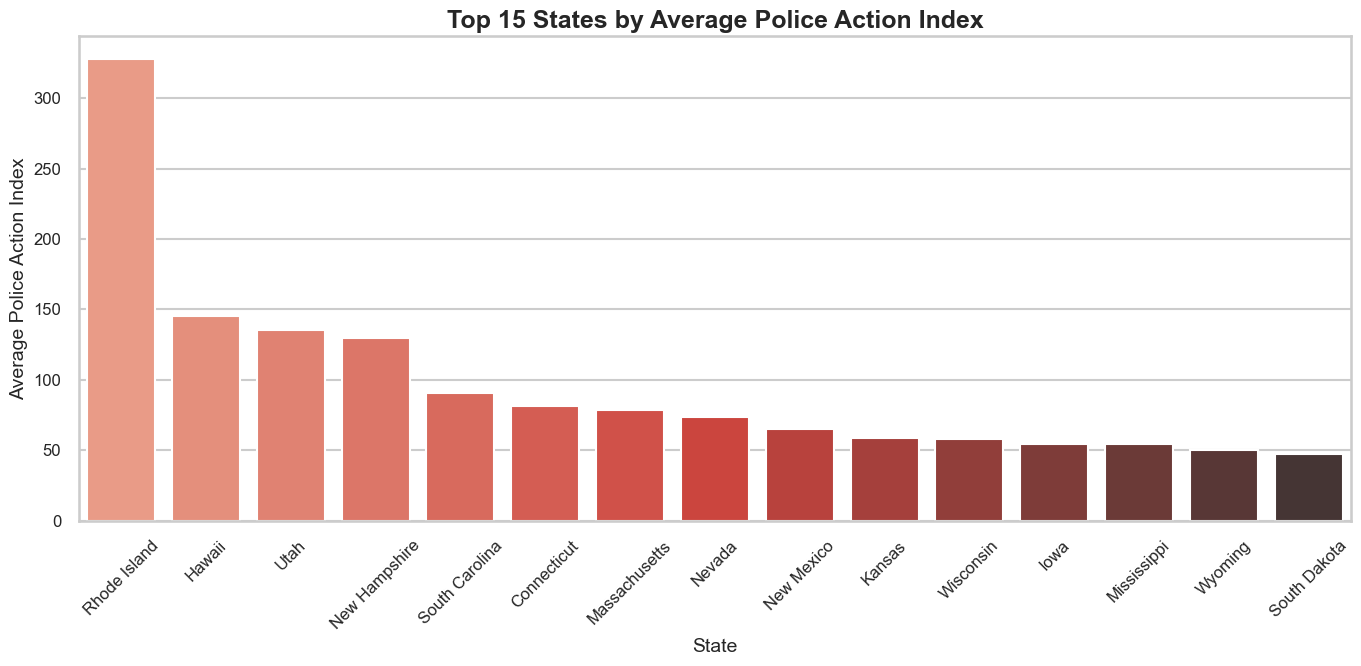

In [211]:
import matplotlib.pyplot as plt


# Set Seaborn style
sns.set(style='whitegrid', context='talk')

# index with number of incidents

city_police = df_index_added.groupby('City Or County')['Police Action Index'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x=city_police.index, y=city_police.values, palette='Blues_d')
plt.title('Top 15 Cities by Average Police Action Index', fontsize=18, weight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Police Action Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


# Top 15 States by Police Action Index
state_police = df_index_added.groupby('State')['Police Action Index'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x=state_police.index, y=state_police.values, palette='Reds_d')
plt.title('Top 15 States by Average Police Action Index', fontsize=18, weight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Police Action Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\hari2\AppData\Local\Temp\ipykernel_4820\3272001743.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




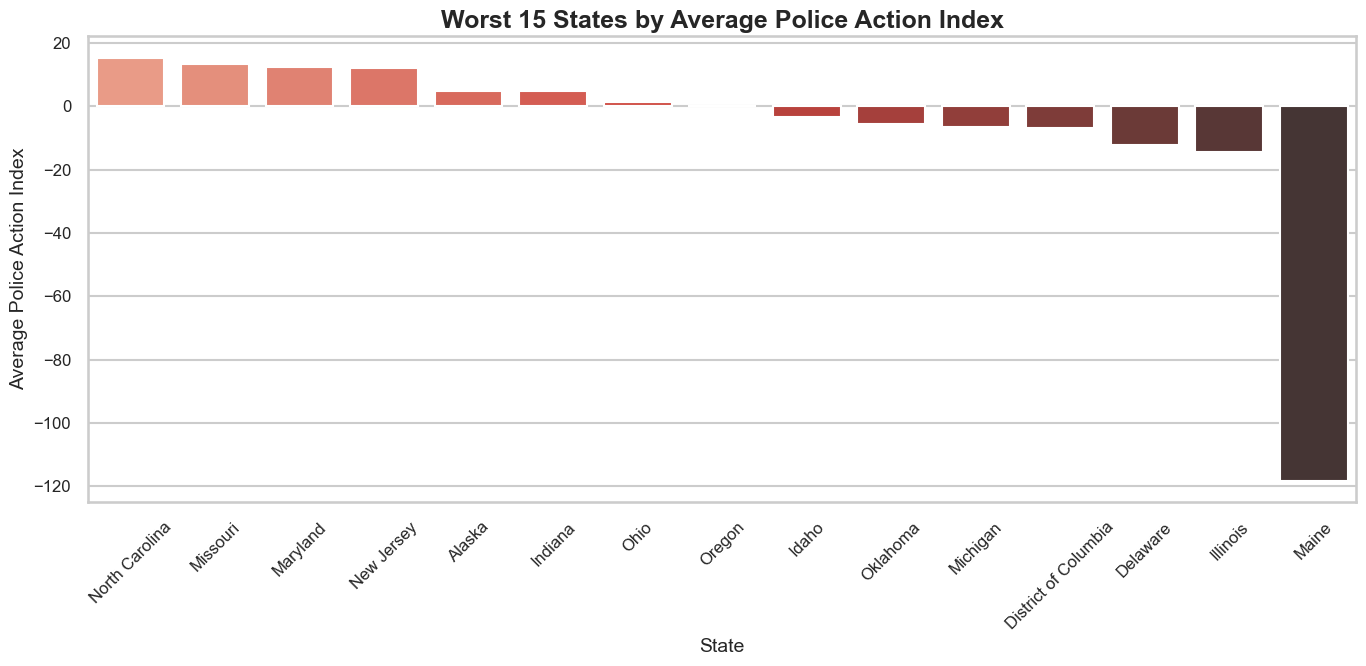

In [165]:
# Bottom 15 States by Police Action Index
state_police_worst = df_index_added.groupby('State')['Police Action Index'].mean().sort_values(ascending=False).tail(15)


plt.figure(figsize=(14, 7))
sns.barplot(x=state_police_worst.index, y=state_police_worst.values, palette='Reds_d')
plt.title('Worst 15 States by Average Police Action Index', fontsize=18, weight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Police Action Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\hari2\AppData\Local\Temp\ipykernel_4820\2157405390.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




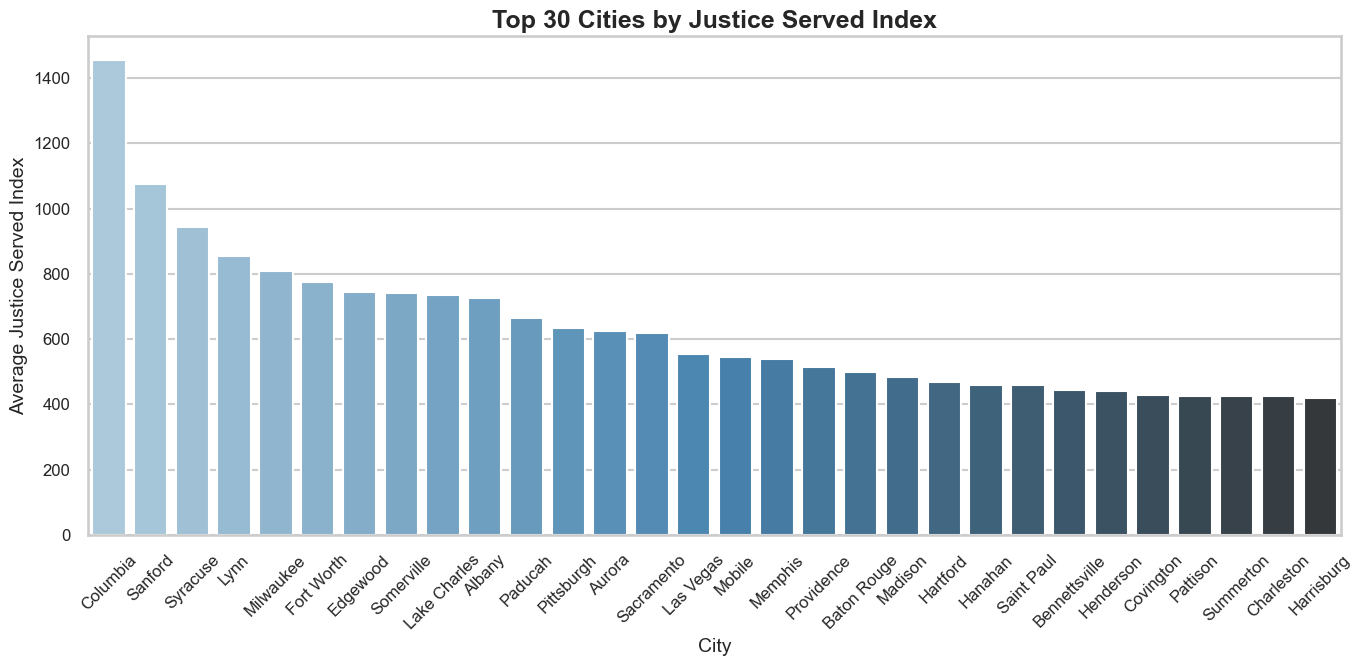

C:\Users\hari2\AppData\Local\Temp\ipykernel_4820\2157405390.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




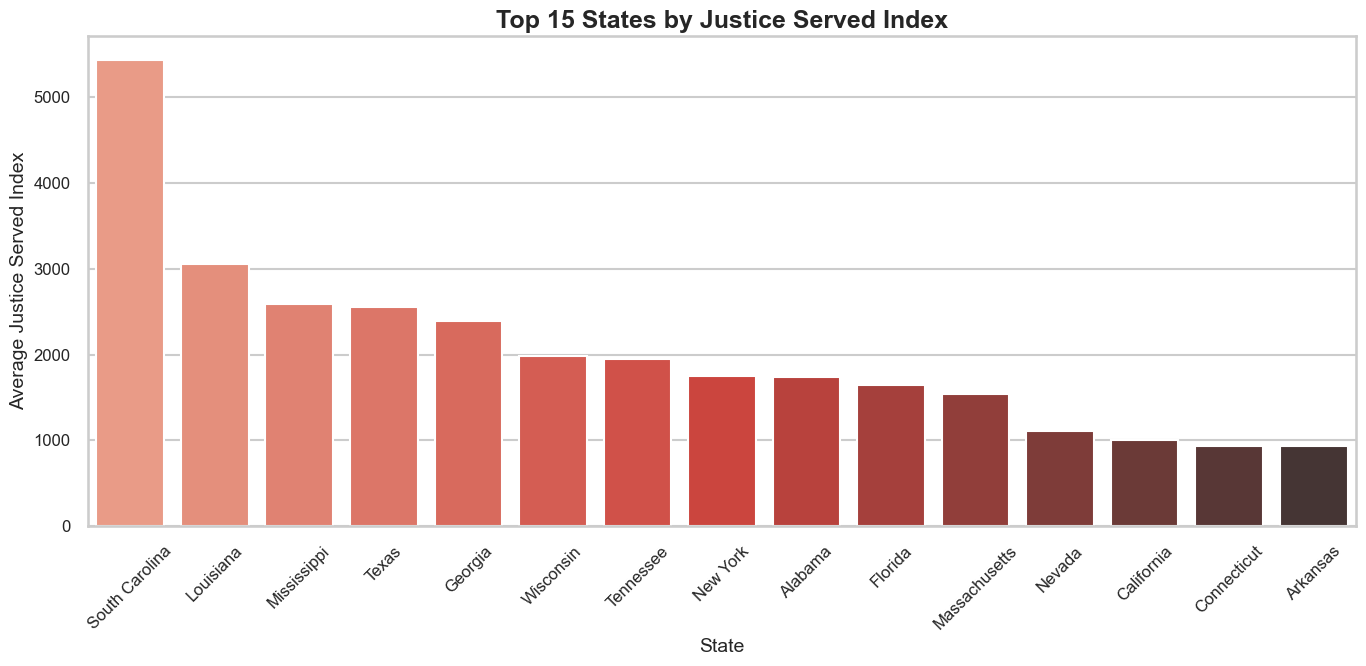

C:\Users\hari2\AppData\Local\Temp\ipykernel_4820\2157405390.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




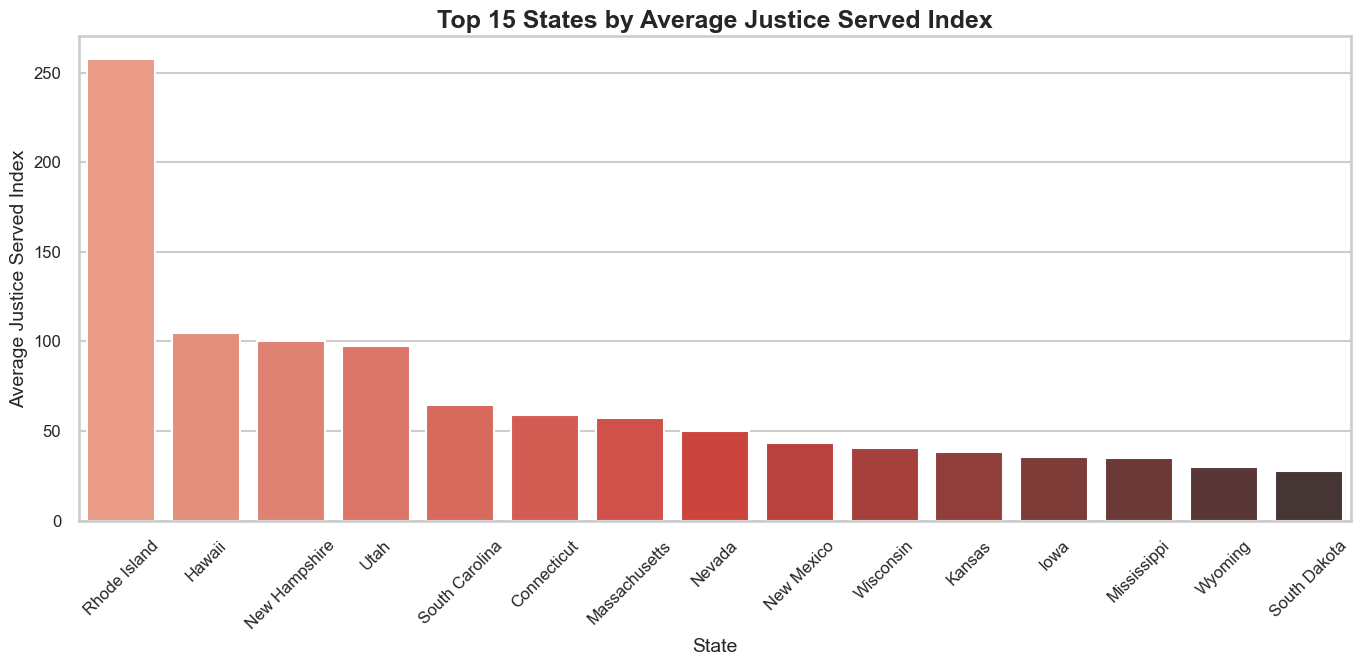

In [277]:
import matplotlib.pyplot as plt


# Set Seaborn style
sns.set(style='whitegrid', context='talk')

# index with number of incidents

city_justice = df_index_added.groupby('City Or County')['Justice Served Index'].sum().sort_values(ascending=False).head(30)

plt.figure(figsize=(14, 7))
sns.barplot(x=city_justice.index, y=city_justice.values, palette='Blues_d')
plt.title('Top 30 Cities by Justice Served Index', fontsize=18, weight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Justice Served Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


# Top 15 States by Justice Index
state_police = df_index_added.groupby('State')['Justice Served Index'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x=state_police.index, y=state_police.values, palette='Reds_d')
plt.title('Top 15 States by Justice Served Index', fontsize=18, weight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Justice Served Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

state_police = df_index_added.groupby('State')['Justice Served Index'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x=state_police.index, y=state_police.values, palette='Reds_d', legend=False)
plt.title('Top 15 States by Average Justice Served Index', fontsize=18, weight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Justice Served Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\hari2\AppData\Local\Temp\ipykernel_4820\1020407207.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




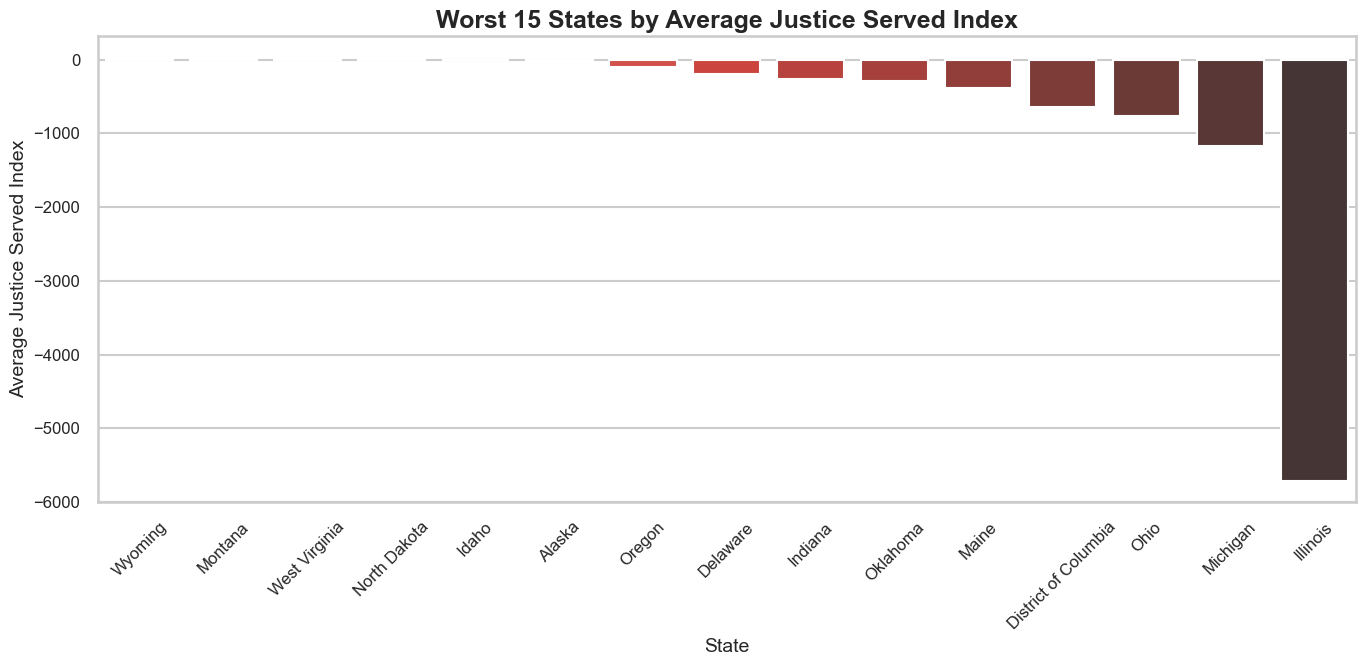

In [155]:
# Bottom 15 States by Justice Index
state_police_worst = df_added4.groupby('State')['Justice Served Index'].mean().sort_values(ascending=False).tail(15)

plt.figure(figsize=(14, 7))
sns.barplot(x=state_police_worst.index, y=state_police_worst.values, palette='Reds_d')
plt.title('Worst 15 States by Average Justice Served Index', fontsize=18, weight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Justice Served Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\hari2\AppData\Local\Temp\ipykernel_4820\1094296061.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




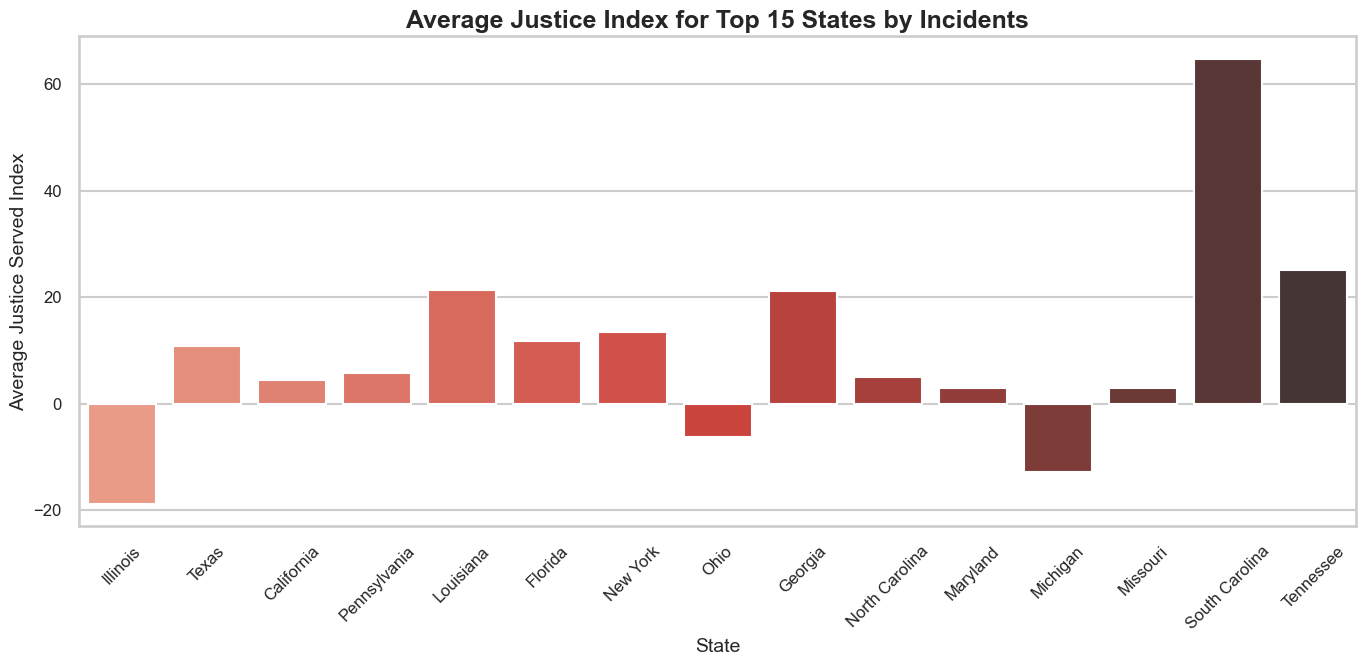

C:\Users\hari2\AppData\Local\Temp\ipykernel_4820\1094296061.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




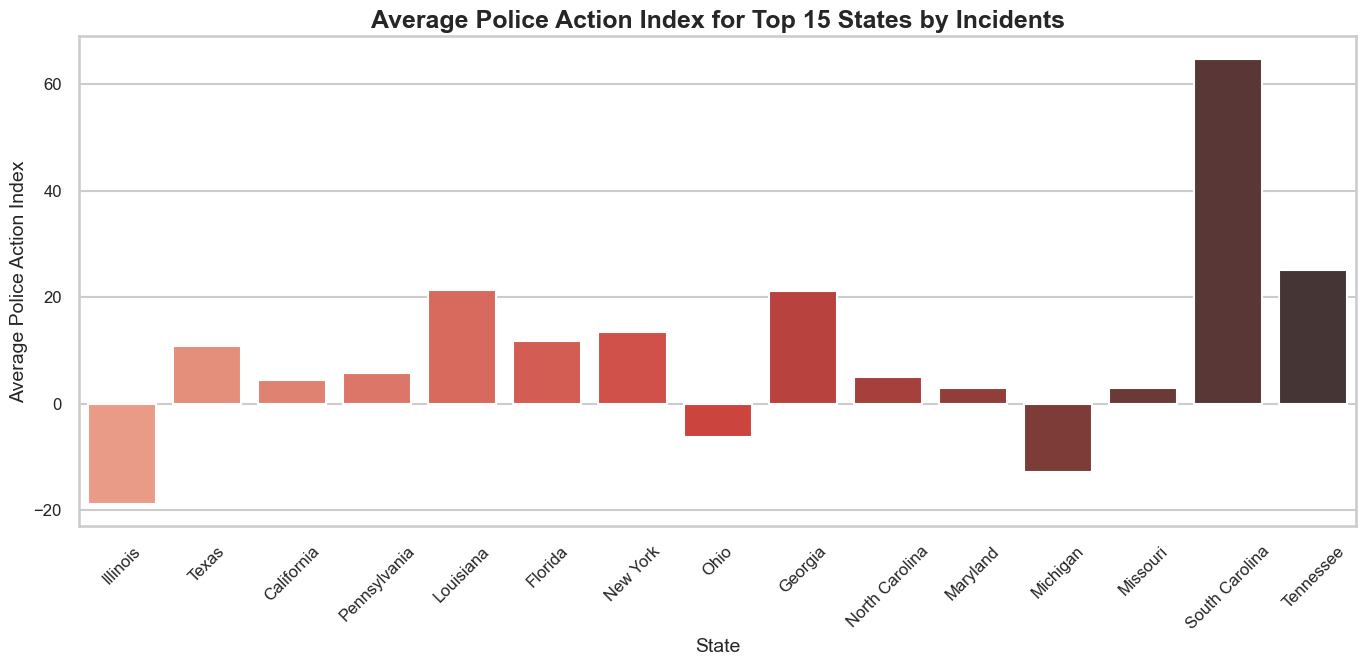

In [293]:
sorted_incident_state = dict(sorted(incident_by_state.items(), key=lambda item: item[1]))


justice_served_by_state = df_index_added.groupby('State')['Justice Served Index'].mean()
police_action_by_state = df_index_added.groupby('State')['Police Action Index'].mean()


sorted_states = sorted(sorted_incident_state.keys(), key=lambda x: sorted_incident_state[x], reverse=True)

top_15_states = sorted_states[:15]

top_15_justice_served = justice_served_by_state.loc[top_15_states]
top_15_police_action = police_action_by_state.loc[top_15_states]



plt.figure(figsize=(14, 7))
sns.barplot(x=top_15_justice_served.index, y=top_15_justice_served.values, palette='Reds_d')
plt.title('Average Justice Index for Top 15 States by Incidents', fontsize=18, weight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Justice Served Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x=top_15_justice_served.index, y=top_15_justice_served.values, palette='Reds_d')
plt.title('Average Police Action Index for Top 15 States by Incidents', fontsize=18, weight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Police Action Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
#state_police_worst = df_added_index.groupby('State')['Justice Served Index'].mean().sort_values(ascending=False).tail(15)


C:\Users\hari2\AppData\Local\Temp\ipykernel_4820\1150592061.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




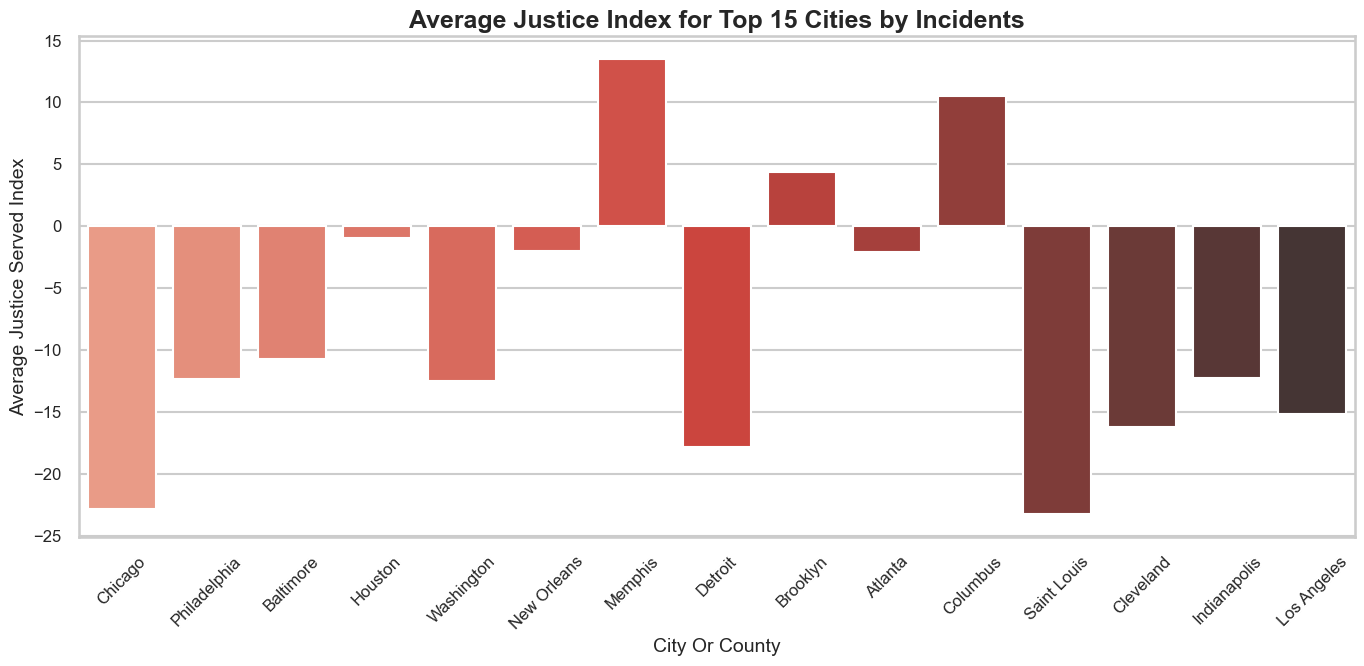

C:\Users\hari2\AppData\Local\Temp\ipykernel_4820\1150592061.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




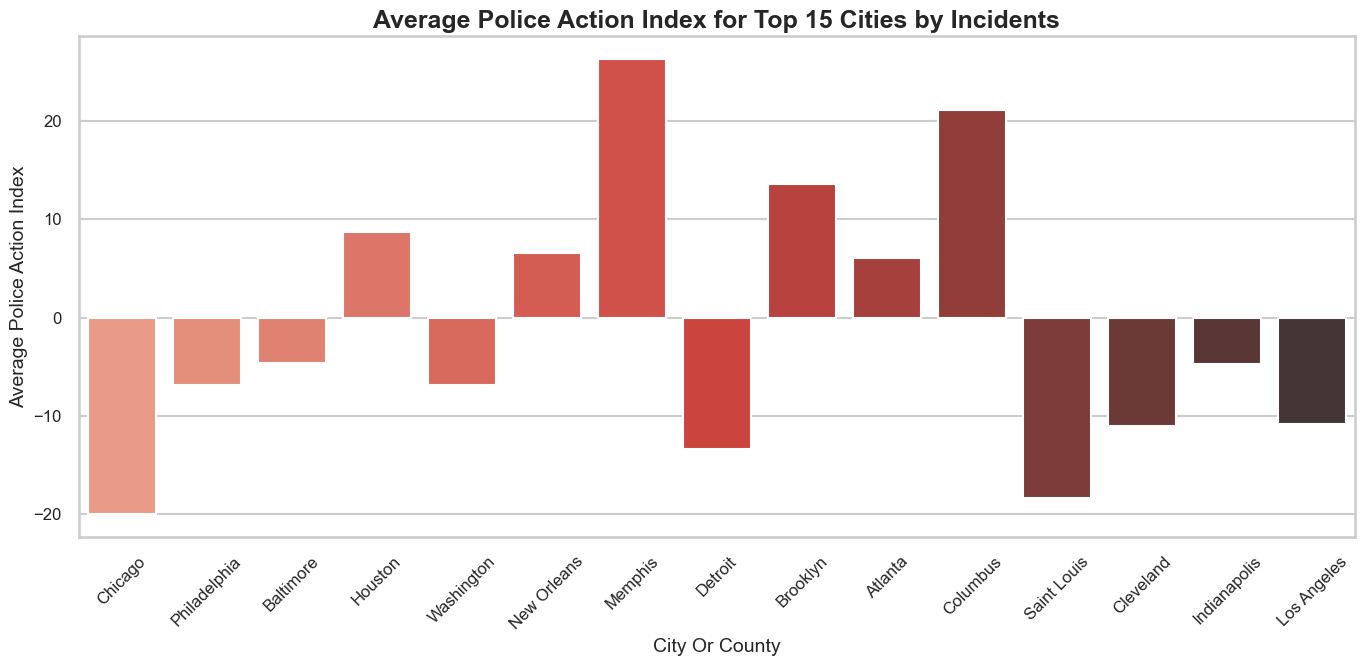

In [291]:
sorted_incident_city = dict(sorted(incident_by_city.items(), key=lambda item: item[1]))


justice_served_by_city = df_index_added.groupby('City Or County')['Justice Served Index'].mean()
police_action_by_city = df_index_added.groupby('City Or County')['Police Action Index'].mean()


sorted_city = sorted(sorted_incident_city.keys(), key=lambda x: sorted_incident_city[x], reverse=True)

top_15_city = sorted_city[:15]

top_15_justice_served = justice_served_by_city.loc[top_15_city]
top_15_police_action = police_action_by_city.loc[top_15_city]



plt.figure(figsize=(14, 7))
sns.barplot(x=top_15_justice_served.index, y=top_15_justice_served.values, palette='Reds_d')
plt.title('Average Justice Index for Top 15 Cities by Incidents', fontsize=18, weight='bold')
plt.xlabel('City Or County', fontsize=14)
plt.ylabel('Average Justice Served Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 7))
sns.barplot(x=top_15_police_action.index, y=top_15_police_action.values, palette='Reds_d')
plt.title('Average Police Action Index for Top 15 Cities by Incidents', fontsize=18, weight='bold')
plt.xlabel('City Or County', fontsize=14)
plt.ylabel('Average Police Action Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

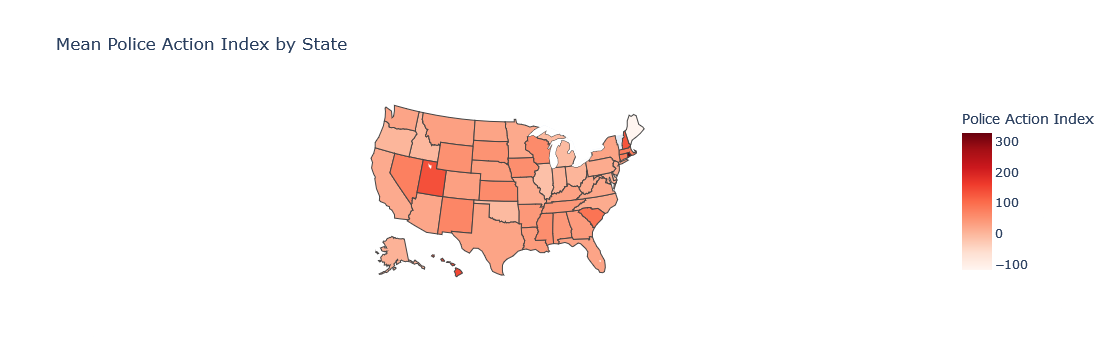

In [251]:
import pandas as pd
import plotly.express as px

# Convert full state names to abbreviations
df_map = df_index_added.copy()
df_map['State'] = df_map['State'].map(state_abbr)

# Calculate total victims killed and injured for each state
total_victims = df_map.groupby('State').agg({'Police Action Index': 'mean', 'Justice Served Index': 'sum'}).reset_index()

# Create choropleth map for victims killed
fig_killed = px.choropleth(
    total_victims,
    locations='State',
    locationmode='USA-states',
    color='Police Action Index',
    scope='usa',
    color_continuous_scale='Reds',
    labels={'Police Action Index': 'Police Action Index'},
    title='Mean Police Action Index by State'
)

# Show the maps
fig_killed.show()

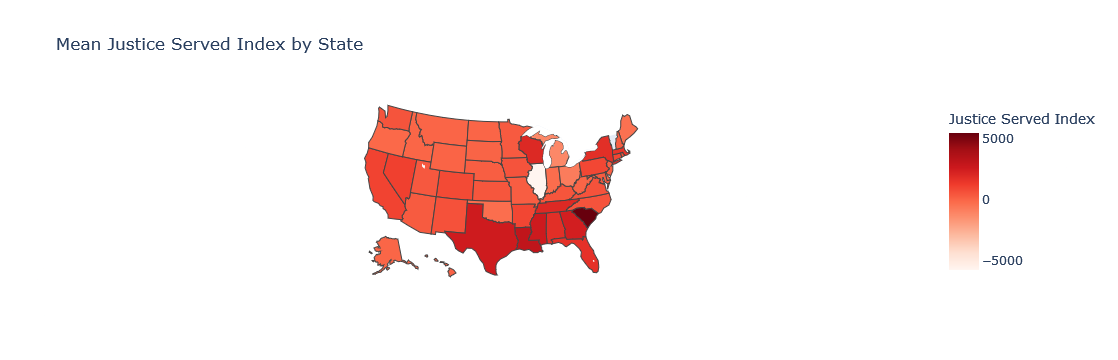

In [285]:
import pandas as pd
import plotly.express as px

# Convert full state names to abbreviations
df_map = df_index_added.copy()
df_map['State'] = df_map['State'].map(state_abbr)

# Calculate total victims killed and injured for each state
total_victims = df_map.groupby('State').agg({'Police Action Index': 'mean', 'Justice Served Index': 'sum'}).reset_index()

# Create choropleth map for victims killed
fig_killed = px.choropleth(
    total_victims,
    locations='State',
    locationmode='USA-states',
    color='Justice Served Index',
    scope='usa',
    color_continuous_scale='Reds',
    labels={'Justice Served Index': 'Justice Served Index'},
    title='Mean Justice Served Index by State'
)

# Show the maps
fig_killed.show()

In [253]:
df_map

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Year,dates_proccessed,Suspect Surrendered,Suspect Captured,Suspects Suicide,Suspects Killed by Cop,Police Action Index,Justice Served Index
0,1582816,"December 29, 2019",IL,Danville,1803 block of Westview Ave,0,5,0,0,0,NaN,2019,2019-12-29,0,0,0,0,-25.0,-25.0
1,1582197,"December 29, 2019",NY,Buffalo,50 block of Henrietta Ave,1,3,0,0,0,NaN,2019,2019-12-29,0,0,0,0,-35.0,-35.0
2,1583444,"December 29, 2019",CA,Ceres,800 block of Allacante Dr,0,5,0,0,0,NaN,2019,2019-12-29,0,0,0,0,-25.0,-25.0
3,1581590,"December 27, 2019",CA,Modesto,1900 block of Vernon Ave,1,3,0,0,0,NaN,2019,2019-12-27,0,0,0,0,-35.0,-35.0
4,1581103,"December 27, 2019",TX,Houston,500 block of Smart St,2,7,0,0,4,NaN,2019,2019-12-27,0,4,0,0,325.0,245.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,2492601,"January 1, 2023",IL,Chicago,300 block of E 57th St,1,3,0,0,0,NaN,2023,2023-01-01,0,0,0,0,-35.0,-35.0
3001,2492611,"January 1, 2023",NC,Durham,1000 N Miami Blvd,0,5,0,0,0,NaN,2023,2023-01-01,0,0,0,0,-25.0,-25.0
3002,2493102,"January 1, 2023",PA,Allentown,1140 E Clair St,0,4,0,0,0,NaN,2023,2023-01-01,0,0,0,0,-20.0,-20.0
3003,2492448,"January 1, 2023",FL,Ocala,1600 block of SW 5th St,2,4,0,0,1,NaN,2023,2023-01-01,0,1,0,0,40.0,20.0


In [ ]:
# Resample the data to get monthly totals
# Convert 'Incident Date' to datetime format
df_map['Incident Date'] = pd.to_datetime(df_map['Incident Date'])

# Set the index to 'Incident Date'
df_map.set_index('Incident Date', inplace=True)

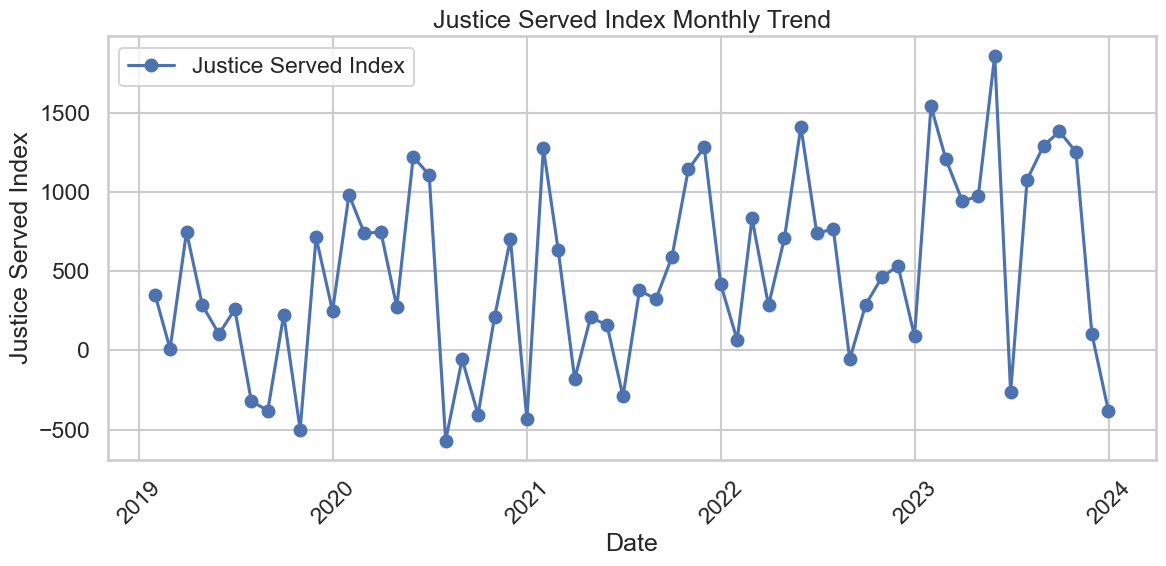

In [281]:
monthly_totals = df_map.resample('ME').agg({'Police Action Index': 'sum', 'Justice Served Index': 'sum'})

# Plotting
plt.figure(figsize=(12, 6))
#plt.plot(monthly_totals.index, monthly_totals['Police Action Index'], label='Police Action Index', marker='o')
plt.plot(monthly_totals.index, monthly_totals['Justice Served Index'], label='Justice Served Index', marker='o')
plt.title('Justice Served Index Monthly Trend')
plt.xlabel('Date')
plt.ylabel('Justice Served Index')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

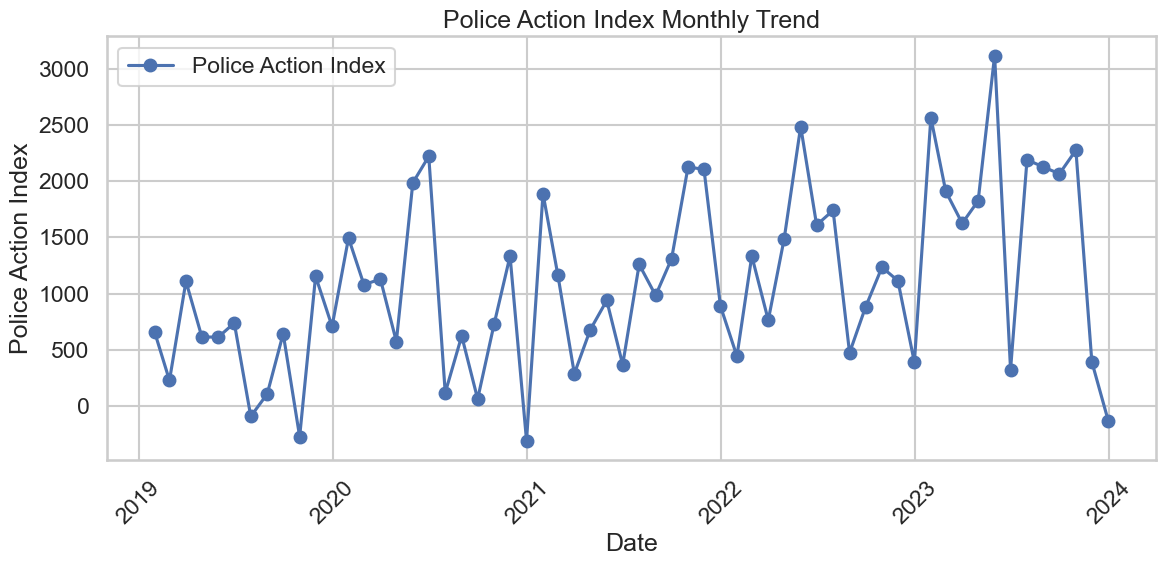

In [289]:
#monthly_totals = df_map.resample('ME').agg({'Police Action Index': 'sum', 'Justice Served Index': 'sum'})

# Plotting
plt.figure(figsize=(12, 6))
#plt.plot(monthly_totals.index, monthly_totals['Police Action Index'], label='Police Action Index', marker='o')
plt.plot(monthly_totals.index, monthly_totals['Police Action Index'], label='Police Action Index', marker='o')
plt.title('Police Action Index Monthly Trend')
plt.xlabel('Date')
plt.ylabel('Police Action Index')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()